In [2]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
from matplotlib import rcParams
from cmocean import cm
import oceansdb

In [3]:
pl.style.use('tableau-colorblind10')
%matplotlib inline

In [4]:
rcParams['axes.formatter.limits'] = (-2, 3)
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 16

In [244]:
with open('./pickleJar/NOMAD_AOP&IOPs.pkl', 'rb') as f:
    d_dict = pickle.load(f)
    d_aop = d_dict['d_aop']

Add boolean column, 'is_hplc', to indicate whether chl data was measured by hplc.

In [246]:
d_aop.loc[(d_aop.fluo_chl.isnull()) &
          (d_aop.hplc_chl.isnull()), 'is_hplc'] = np.NaN

In [248]:
d_aop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 38 columns):
id              4459 non-null object
datetime        4459 non-null datetime64[ns]
doy             4459 non-null float64
lat             4459 non-null float64
lon             4459 non-null float64
etopo2          4459 non-null float64
bathymetry      4459 non-null float64
oisst           4459 non-null float64
wtemp           1235 non-null float64
woa_sst_mean    2516 non-null float64
woa_sst_se      2516 non-null float64
sal             672 non-null float64
woa_sal_mean    2511 non-null float64
woa_sal_se      2511 non-null float64
rrs405          12 non-null float64
rrs411          4293 non-null float64
rrs443          4456 non-null float64
rrs455          393 non-null float64
rrs465          375 non-null float64
rrs489          4422 non-null float64
rrs510          3435 non-null float64
rrs520          1559 non-null float64
rrs530          1589 non-null float64
rrs550          91

In [249]:
d_dict['d_aop'] = d_aop

In [250]:
with open('./pickleJar/NOMAD_AOP&IOPs.pkl', 'wb') as f:
    pickle.dump(d_dict, f)

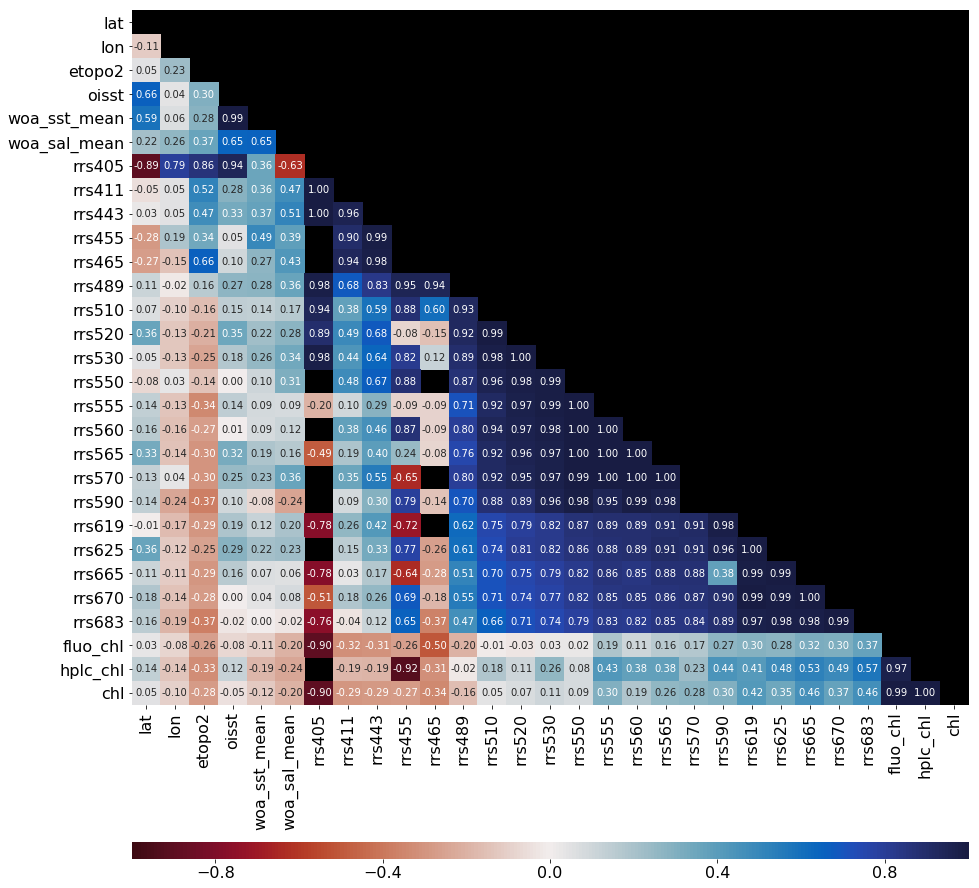

In [29]:
_, ax = pl.subplots(figsize=(15, 18))
ax.set_facecolor('k')
cols=['lat','lon','etopo2', 'oisst', 'woa_sst_mean', 'woa_sal_mean'] +\
        [col for col in d_aop.columns if 'rrs' in col] +\
        ['fluo_chl', 'hplc_chl', 'chl']
sb.heatmap(d_aop[cols].corr(), cmap=cm.balance_r, annot=True, vmin=-1, vmax=1,
           mask=np.triu(np.ones([len(cols)]*2)), ax=ax, fmt='.2f',
          cbar_kws={'aspect': 50, 'orientation': 'horizontal', 'pad': 0.14});

In [30]:
row = d_aop.iloc[0]

In [59]:
np.isnan(row.rrs665)

True

In [178]:
row[['id', 'rrs619', 'rrs625', 'rrs665', 'rrs670', 'rrs683']]

id              1565
rrs619           NaN
rrs625    0.00661863
rrs665           NaN
rrs670    0.00346456
rrs683    0.00366944
Name: 0, dtype: object

In [66]:
def pairwise_fill(row, feature_1, feature_2):
    """simple pairwise imputation"""
    if np.isnan(row[feature_1]):
        return row[feature_2]
    else:
        return row[feature_1]

### Red - 670

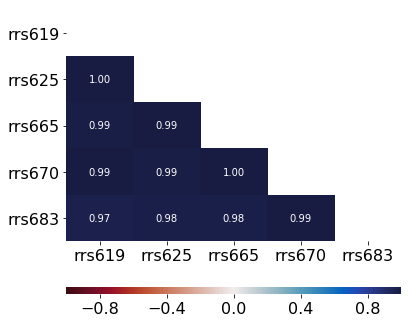

In [200]:
%matplotlib inline
_, ax= pl.subplots(figsize=(6,6))
red_cols = ['rrs619', 'rrs625', 'rrs665', 'rrs670', 'rrs683']
sb.heatmap(d_reds[red_cols].corr(), cmap=cm.balance_r, annot=True, vmin=-1, vmax=1,
           mask=np.triu(np.ones([len(red_cols)]*2)), ax=ax, fmt='.2f',
          cbar_kws={'aspect': 50, 'orientation': 'horizontal', 'pad': 0.14});

In [199]:
d_reds.

,rrs619,rrs625,rrs665,rrs670,rrs683,red,rrs670_fr_625
count,883.000000,1884.000000,2641.000000,1598.000000,2008.000000,3905.000000,1884.000000
mean,0.002230,0.001901,0.000689,0.001557,0.001312,0.000762,0.001307
std,0.003681,0.003190,0.001687,0.002387,0.002300,0.001676,0.002247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000032
25%,0.000200,0.000228,0.000088,0.000200,0.000100,0.000100,0.000129
50%,0.000500,0.000486,0.000173,0.000614,0.000328,0.000200,0.000311
75%,0.002900,0.002479,0.000428,0.002000,0.001700,0.000571,0.001715
max,0.039300,0.043714,0.028000,0.027700,0.033300,0.027700,0.030763


In [146]:
d_reds = d_aop[['id', 'rrs619', 'rrs625', 'rrs665', 'rrs670', 'rrs683']]
d_reds.insert(d_reds.shape[1], 'red', np.NaN)

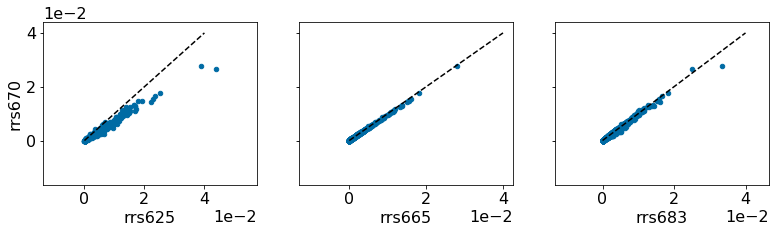

In [147]:
reds_ = ['rrs625', 'rrs665', 'rrs683']
lr = len(reds_)
f, axs = pl.subplots(ncols=lr, figsize=(4*lr+1, lr), sharey=True)
for ax, red in zip(axs.ravel(), reds_):
    d_reds[[red, 'rrs670']].dropna().plot(x=red, y='rrs670', kind='scatter', ax=ax)
    ax.plot([0, 4e-2], [0, 4e-2], 'k--')

## So, it seems safe to impute 665 and 683 to missing 670 values. I'll need a regression for 625, however.

In [148]:
d_reds[['red']] = d_reds.apply(pairwise_fill, axis=1, args=('rrs670', 'rrs665'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs619    883 non-null float64
rrs625    1884 non-null float64
rrs665    2641 non-null float64
rrs670    1598 non-null float64
rrs683    2008 non-null float64
red       3357 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


In [149]:
d_reds['red'] = d_reds.apply(pairwise_fill, axis=1, args=('red', 'rrs683'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs619    883 non-null float64
rrs625    1884 non-null float64
rrs665    2641 non-null float64
rrs670    1598 non-null float64
rrs683    2008 non-null float64
red       3365 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


The graph above shows 625, to be well correlated to, but with a different slope than 670. So, I'll run a linear regression for a '670' imputation based on 625.

In [126]:
from sklearn.linear_model import LinearRegression as LR

In [152]:
lr = LR()
xy = d_reds[['rrs625', 'rrs670']].dropna().as_matrix()

In [153]:
lr.fit(xy[:,0].reshape(-1, 1), xy[:, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
y_pred = lr.predict(xy[:, 0].reshape(-1, 1))

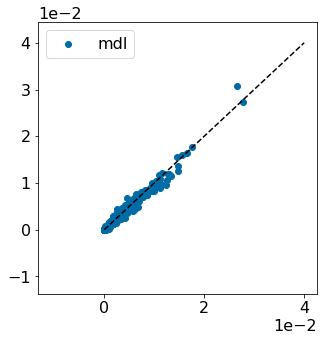

In [179]:
pl.figure(figsize=(5,5))
pl.scatter(xy[:,1], y_pred, label='mdl')
pl.legend()
pl.plot([0, 4e-2], [0, 4e-2], 'k--')

In [161]:
rrs670_fr_625 = lr.predict(d_reds[['rrs625']].dropna())

In [163]:
d_reds.loc[:,'rrs670_fr_625'] = np.NaN

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [164]:
d_reds.loc[~d_reds.rrs625.isnull(),'rrs670_fr_625'] = rrs670_fr_625

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [165]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 8 columns):
id               4459 non-null object
rrs619           883 non-null float64
rrs625           1884 non-null float64
rrs665           2641 non-null float64
rrs670           1598 non-null float64
rrs683           2008 non-null float64
red              3365 non-null float64
rrs670_fr_625    1884 non-null float64
dtypes: float64(7), object(1)
memory usage: 278.8+ KB


In [166]:
d_reds['red'] = d_reds.apply(pairwise_fill, axis=1, args=('red', 'rrs670_fr_625'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
d_reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 8 columns):
id               4459 non-null object
rrs619           883 non-null float64
rrs625           1884 non-null float64
rrs665           2641 non-null float64
rrs670           1598 non-null float64
rrs683           2008 non-null float64
red              3905 non-null float64
rrs670_fr_625    1884 non-null float64
dtypes: float64(7), object(1)
memory usage: 278.8+ KB


I'm not imputing from red619, because there are no NaNs left to fill in 670 that correspond to existing 619.

### Green - Rrs555

In [202]:
greens = ['rrs550', 'rrs555', 'rrs560', 'rrs565', 'rrs570']

In [180]:
d_greens = d_aop[['id'] + greens]
d_greens.insert(d_greens.shape[1], 'green', np.NaN)
d_greens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs550    912 non-null float64
rrs555    3255 non-null float64
rrs560    1193 non-null float64
rrs565    1884 non-null float64
rrs570    816 non-null float64
green     0 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


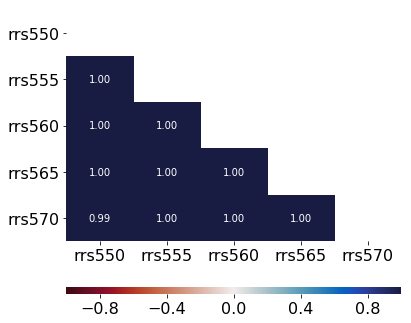

In [204]:
_, ax = pl.subplots(figsize=(6,6))
sb.heatmap(d_aop[greens].corr(), cmap=cm.balance_r, annot=True, vmin=-1, vmax=1,
           mask=np.triu(np.ones([len(greens)]*2)), ax=ax, fmt='.2f',
          cbar_kws={'aspect': 50, 'orientation': 'horizontal', 'pad': 0.14});

In [183]:
d_greens[(~d_greens.rrs550.isnull())|(~d_greens.rrs555.isnull()) |
        ` (~d_greens.rrs560.isnull())|(~d_greens.rrs565.isnull()) |
         (~d_greens.rrs570.isnull())].shape

(4453, 7)

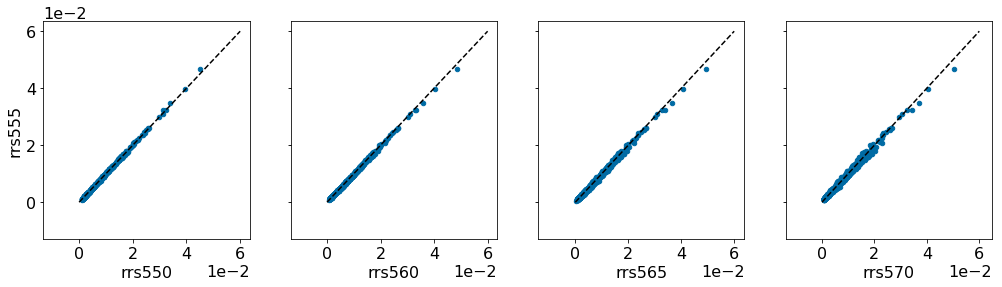

In [184]:
greens.remove('rrs555')
lr = len(greens)
f, axs = pl.subplots(ncols=lr, figsize=(4*lr+1, lr), sharey=True)
for ax, gr in zip(axs.ravel(), greens):
    
    d_greens[[gr, 'rrs555']].dropna().plot(x=gr, y='rrs555', kind='scatter', ax=ax)
    ax.plot([0, 6e-2], [0, 6e-2], 'k--')

In [190]:
d_reds.loc[d_reds.rrs670.isnull()].tail(20)

,id,rrs619,rrs625,rrs665,rrs670,rrs683,red,rrs670_fr_625
4303,7636,0.000041,NaN,0.000017,NaN,0.000042,0.000017,NaN
4304,7637,0.000104,NaN,0.000056,NaN,0.000128,0.000056,NaN
4305,7638,0.000035,NaN,0.000015,NaN,0.000019,0.000015,NaN
4306,7639,0.000024,NaN,0.000009,NaN,0.000019,0.000009,NaN
4307,7640,0.000176,NaN,0.000066,NaN,0.000070,0.000066,NaN
4308,7641,0.000133,NaN,0.000042,NaN,0.000069,0.000042,NaN
4309,7642,0.000196,NaN,0.000053,NaN,0.000080,0.000053,NaN
4310,7643,0.000102,NaN,0.000051,NaN,0.000133,0.000051,NaN
4311,7493,NaN,NaN,0.000026,NaN,0.000040,0.000026,NaN
4312,7494,NaN,NaN,0.000025,NaN,0.000037,0.000025,NaN


In [191]:
# pairwise imputation
d_greens['green'] = d_greens.apply(pairwise_fill, axis=1, args=('green', 'rrs555'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [192]:
d_greens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs550    912 non-null float64
rrs555    3255 non-null float64
rrs560    1193 non-null float64
rrs565    1884 non-null float64
rrs570    816 non-null float64
green     3255 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


In [193]:
for gr in greens:
    d_greens['green'] = d_greens.apply(pairwise_fill, axis=1, args=('green', gr))
d_greens.info()

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 7 columns):
id        4459 non-null object
rrs550    912 non-null float64
rrs555    3255 non-null float64
rrs560    1193 non-null float64
rrs565    1884 non-null float64
rrs570    816 non-null float64
green     4453 non-null float64
dtypes: float64(6), object(1)
memory usage: 243.9+ KB


### Blues

In [206]:
blues = ['rrs405', 'rrs411', 'rrs443' ,'rrs455',
         'rrs465', 'rrs489', 'rrs510', 'rrs520']

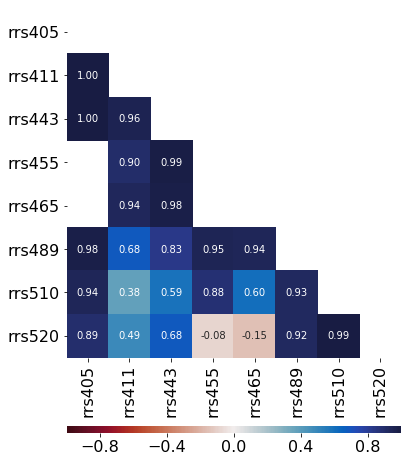

In [209]:
_, ax = pl.subplots(figsize=(6,9))
sb.heatmap(d_aop[blues].corr(), cmap=cm.balance_r, annot=True, vmin=-1, vmax=1,
           mask=np.triu(np.ones([len(blues)]*2)), ax=ax, fmt='.2f',
          cbar_kws={'aspect': 50, 'orientation': 'horizontal', 'pad': 0.14});

In [210]:
d_aop[blues].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 8 columns):
rrs405    12 non-null float64
rrs411    4293 non-null float64
rrs443    4456 non-null float64
rrs455    393 non-null float64
rrs465    375 non-null float64
rrs489    4422 non-null float64
rrs510    3435 non-null float64
rrs520    1559 non-null float64
dtypes: float64(8)
memory usage: 278.8 KB


In [211]:
d_blues = d_aop[blues]

In [213]:
d_blues.loc[(~d_blues.rrs510.isnull()) | (~d_blues.rrs520.isnull())].shape

(4207, 8)

In [215]:
d_blues.drop(['rrs405', 'rrs455','rrs465'], axis=1, inplace=True)

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [217]:
d_blues['510_i'] = np.NaN

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [218]:
d_blues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 6 columns):
rrs411    4293 non-null float64
rrs443    4456 non-null float64
rrs489    4422 non-null float64
rrs510    3435 non-null float64
rrs520    1559 non-null float64
510_i     0 non-null float64
dtypes: float64(6)
memory usage: 209.1 KB


In [219]:
d_blues['510_i'] = d_blues.apply(pairwise_fill, axis=1, args=('510_i', 'rrs510'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
d_blues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 6 columns):
rrs411    4293 non-null float64
rrs443    4456 non-null float64
rrs489    4422 non-null float64
rrs510    3435 non-null float64
rrs520    1559 non-null float64
510_i     3435 non-null float64
dtypes: float64(6)
memory usage: 209.1 KB


In [221]:
d_blues['rrs510_i'] = d_blues.apply(pairwise_fill, axis=1, args=('510_i', 'rrs520'))

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [238]:
d_blues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 6 columns):
rrs411      4293 non-null float64
rrs443      4456 non-null float64
rrs489      4422 non-null float64
rrs510      3435 non-null float64
rrs520      1559 non-null float64
rrs510_i    4207 non-null float64
dtypes: float64(6)
memory usage: 209.1 KB


In [ ]:
datetime        4459 non-null datetime64[ns]
doy             4459 non-null float64
lat             4459 non-null float64
lon             4459 non-null float64
etopo2          4459 non-null float64
bathymetry      4459 non-null float64
oisst           4459 non-null float64
wtemp           1235 non-null float64
woa_sst_mean    2516 non-null float64
woa_sst_se      2516 non-null float64
sal             672 non-null float64
woa_sal_mean    2511 non-null float64
woa_sal_se      2511 non-null float64

In [253]:
smpl_cols1 = ['id', 'datetime', 'doy', 'lat', 'lon', 'etopo2', 'bathymetry',
             'oisst', 'wtemp', 'woa_sst_mean', 'woa_sst_se',
             'sal', 'woa_sal_mean', 'woa_sal_se']
smpl_cols2 = ['rrs411', 'rrs443', 'rrs489', 'rrs510', 'rrs555','rrs670']
smpl_cols3 = ['fluo_chl', 'hplc_chl', 'is_hplc', 'chl']
d_aop_2 = pd.DataFrame(columns=smpl_cols1 + smpl_cols2 + smpl_cols3)
d_aop_2[smpl_cols1] = d_aop[smpl_cols1]
d_aop_2[['rrs411', 'rrs443', 'rrs489']] = d_aop[['rrs411', 'rrs443', 'rrs489']]
d_aop_2['rrs510'] = d_blues.rrs510_i
d_aop_2['rrs555'] = d_greens.green
d_aop_2['rrs670'] = d_reds.red
d_aop_2[smpl_cols3] = d_aop[smpl_cols3]

In [252]:
d_blues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 6 columns):
rrs411      4293 non-null float64
rrs443      4456 non-null float64
rrs489      4422 non-null float64
rrs510      3435 non-null float64
rrs520      1559 non-null float64
rrs510_i    4207 non-null float64
dtypes: float64(6)
memory usage: 209.1 KB


In [254]:
d_aop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 24 columns):
id              4459 non-null object
datetime        4459 non-null datetime64[ns]
doy             4459 non-null float64
lat             4459 non-null float64
lon             4459 non-null float64
etopo2          4459 non-null float64
bathymetry      4459 non-null float64
oisst           4459 non-null float64
wtemp           1235 non-null float64
woa_sst_mean    2516 non-null float64
woa_sst_se      2516 non-null float64
sal             672 non-null float64
woa_sal_mean    2511 non-null float64
woa_sal_se      2511 non-null float64
rrs411          4293 non-null float64
rrs443          4456 non-null float64
rrs489          4422 non-null float64
rrs510          4207 non-null float64
rrs555          4453 non-null float64
rrs670          3905 non-null float64
fluo_chl        3392 non-null float64
hplc_chl        1381 non-null float64
is_hplc         4127 non-null float64
chl           

In [255]:
d_aop_2.to_pickle('./pickleJar/dfNomad_AOP.pkl')